In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = read_csv('pima-indians-diabetes.csv')

X = df.drop('class',axis = 1)
Y = df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)

In [3]:
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel = 'linear' , probability = True)

probas1 = classifier1.fit(x_train , y_train).predict_proba(x_test)
probas2 = classifier2.fit(x_train , y_train).predict_proba(x_test)

In [4]:
fpr1 , tpr1 , thresholds1 = roc_curve(y_test ,probas1[: , 1])
roc_auc1 = auc(fpr1,tpr1)
print("Area under the ROC curve : %f" %roc_auc1)

Area under the ROC curve : 0.830123


In [5]:
fpr2 , tpr2 , thresholds2 = roc_curve(y_test ,probas2[: , 1])
roc_auc2 = auc(fpr2,tpr2)
print("Area under the ROC curve : %f" %roc_auc2)

Area under the ROC curve : 0.836043


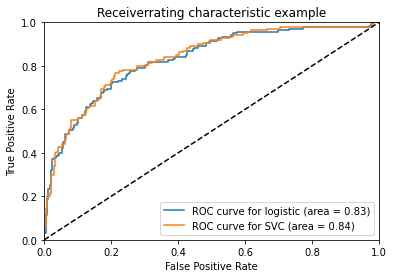

In [6]:
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()